# Bildsegmentierung mit StarDist

StarDist ist eine auf Deep Learning basierende Bildsegmentierungsmethode zur Segmentierung von Objekten wie Zellkernen.

Siehe auch
* [StarDist in den Proceedings von MICCAI 2018](https://link.springer.com/chapter/10.1007/978-3-030-00934-2_30)
* [StarDist auf GitHub](https://github.com/stardist/stardist)
* [StarDist NEUBIAS Academy Webinar](https://www.youtube.com/watch?v=Amn_eHRGX5M)
* [StarDist Vorhersagebeispiel](https://github.com/stardist/stardist/blob/master/examples/2D/3_prediction.ipynb)

Wie üblich beginnen wir mit dem Laden eines Beispielbildes.

In [10]:
from stardist.models import StarDist2D
from csbdeep.utils import normalize
from stardist import random_label_cmap

import stackview
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import human_mitosis

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
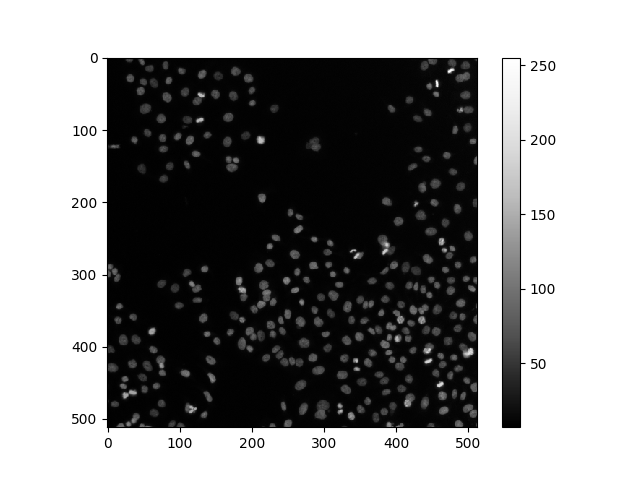
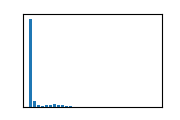

In [2]:
image = human_mitosis()
stackview.insight(image)

## Laden eines Modells
Modelle sind Dateien, die typischerweise ein neuronales Netzwerk enthalten, das in der Lage ist, ein Bild zu segmentieren. StarDist kommt mit einigen vortrainierten Modellen, um zu demonstrieren, wie der Algorithmus in einem allgemeinen Anwendungsfall wie der Zellkernsegmentierung funktioniert. Wenn ein solches vortrainiertes Modell bei Ihren Daten nicht gut funktioniert (seien Sie ein guter Wissenschaftler und überprüfen Sie das sorgfältig!), müssen Sie [Ihr eigenes Modell trainieren](https://github.com/stardist/stardist/blob/master/examples/2D/2_training.ipynb), das zu Ihren Daten passt. Für das Training benötigen Sie wahrscheinlich eine leistungsstarke GPU, für die Anwendung eines Modells (Vorhersageschritt) auf ein 2D-Bild ist keine GPU erforderlich.

In [3]:
# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


## Normalisierung des Eingangsbildes
Viele Algorithmen, die neuronale Netze verwenden, benötigen normalisierte Eingangsdaten, um damit arbeiten zu können. Zum Beispiel können Sie das 1%- und das 99,8%-Perzentil bestimmen (das ist sehr üblich) und Ihr Bild so normalisieren, dass die Intensitäten, die sich zwischen diesen Perzentilen ausbreiten, anschließend im Bereich zwischen 0 und 1 liegen. Wir müssen dies tun, weil das Modell auf einem Bild in diesem Bereich trainiert wurde und möglicherweise nicht in der Lage ist, Bilder mit unterschiedlichen Intensitätsbereichen zu segmentieren.

In [7]:
axis_norm = (0,1)
image = normalize(image, 1,99.8, axis=axis_norm)

Die Segmentierung des Bildes und die Beschriftung der einzelnen Objekte wird in der künstlichen Intelligenz-Gemeinschaft oft als "Instanzsegmentierung" oder "Vorhersage" bezeichnet.

1/1 [==============================] - 0s 127ms/step


StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
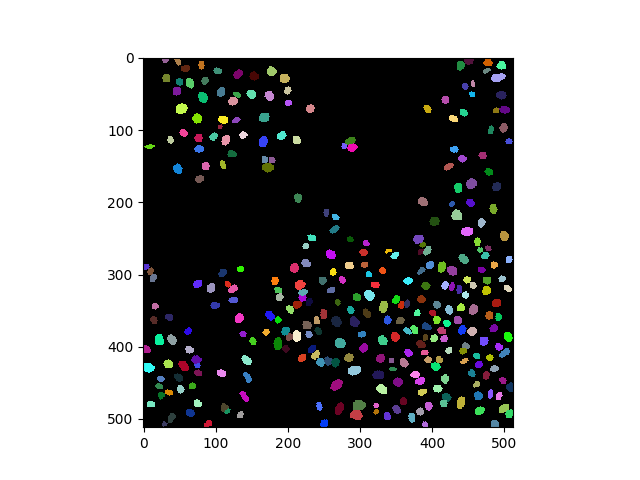

In [9]:
labels, details = model.predict_instances(image)

stackview.insight(labels)

## Ergebnisvisualisierung
Zell- / Zellkernsegmentierungsergebnisse lassen sich am besten überprüfen, wenn das resultierende Labelbild über das Originalbild gelegt wird

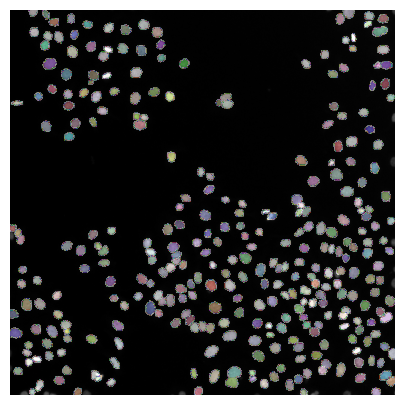

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(image, clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=random_label_cmap(), alpha=0.5)
plt.axis('off');

... oder indem Umrisse um segmentierte Regionen gezeichnet werden.

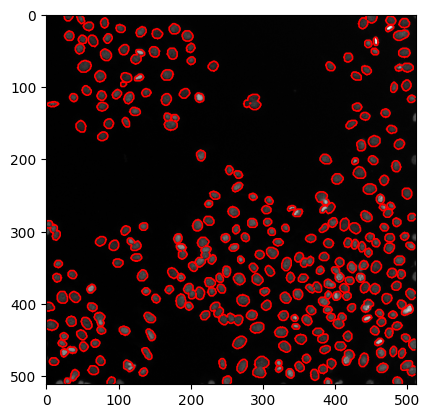

In [12]:
# create a new plot
fig, axes = plt.subplots(1,1)

# add two images
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(labels, [0.5], linewidths=1.2, colors='r')

Hinweis: Das Modell, das wir hier auf blobs.gif angewendet haben, wurde nicht darauf trainiert. Das Ergebnis sieht trotzdem nicht so schlecht aus.

## Weitere verfügbare vortrainierte Modelle

StarDist bietet weitere verfügbare vortrainierte Modelle an.

In [13]:
StarDist2D.from_pretrained() 

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


## Übung
Laden Sie `../../data/blobs.tif` und wenden Sie Cellpose darauf an.